Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission.
Each group of students (mostly pairs, with some approved exceptions) should submit a Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. 
For example, for two submitters, the naming format is: id1_id2.ipynb.

# Question 1

a) Download the "Boston1.csv" database, and explore the data. Explanation about the dataset can be found here: http://www.clemson.edu/economics/faculty/wilson/R-tutorial/analyzing_data.html

Find the columns with missing values and filter them out of the data.

In [20]:
import pandas as pd
import numpy as np
from IPython.display import display
df = pd.read_csv("Boston1.csv")

print("Let's see the first 2 rows of the table so we can compare after filtering:\n");
display(df.head(2))

print ("The Columns with missing values are:")
for col_lab in df.axes[1]:
    if df[col_lab].isnull().any():
        print(col_lab)
        del df[col_lab]

print("Let's see the first 2 rows now, after filtering:\n");
display(df.head(2))
print("As we can see, the right column is filtered out of the data.")

Let's see the first 2 rows of the table so we can compare after filtering:



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,randCol,misData
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0,0.365395,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0.424966,NaN


The Columns with missing values are:
misData
Let's see the first 2 rows now, after filtering:



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,randCol
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0,0.365395
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0.424966


As we can see, the right column is filtered out of the data.


b) Divide the filtered data randomly into a train set (70% of the data) and test set (30% of the data).

In [21]:
train = df.sample(frac=0.7)
test = df.drop(train.index)

print ("Train (in %): ",train.shape[0]/df.shape[0])
print ("Test (in %): ",test.shape[0]/df.shape[0])


Train (in %):  0.6996047430830039
Test (in %):  0.30039525691699603


# Question 2

If you haven't done this previously, install the scikit-learn package for python.

a) On the train set, run a linear regression model as follows:
Divide the training set into explanatory variables (the X matrix with which we'll try to make a prediction) and a target variable (y, the value which we'll try to predict). Use the 'medv' attribute as the target variable y and the rest of the features as the X matrix. Run a linear regression model on those sets, and print the regression coefficients. 

In [22]:
from IPython.display import display
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
train_x = train.drop(['medv'],axis=1)
train_y = train['medv']
mdl.fit(train_x,train_y)

print("The regression coefficients are: \n")
i=0;
for col_lab in train_x.axes[1]:
    print(col_lab,":",mdl.coef_[i])
    i = i+1

The regression coefficients are: 

crim : -0.10138597999526562
zn : 0.039934453286959964
indus : 0.04212590152038972
chas : 0.7883789506415501
nox : -20.45045098199675
rm : 3.2520242249626565
age : 0.009990924111772229
dis : -1.5770778502982925
rad : 0.2969062823557452
tax : -0.011530701484062392
ptratio : -1.162045699376542
black : 0.009734297749710477
lstat : -0.5513277058468775
randCol : 0.768865952289932


b) Use the linear regression model to predict the values of the test set's 'medv' column, based on the test set's other attributes. Print the Mean Squared Error of the model on the train set and on the test set.
Usually, the MSE on the train set would be lower than the MSE on the test set, since the model parameters are optimized with respect to the train set. Must this always be the case? Can you think of a few examples for when this might not be the case?

In [23]:
from sklearn.metrics import mean_squared_error as mse

test_x = test.drop(['medv'],axis=1)
test_y = test['medv']
predicted_y_train = mdl.predict(train_x)
predicted_y_test = mdl.predict(test_x)

print("Train MSE:",mse(predicted_y_train, train_y))
print("Test MSE:",mse(predicted_y_test, test_y))

print("")
print("Usually, the MSE on the train set would be lower than the MSE on the test set,")
print("but it's not always the case.")
print("for example, if we have a lot of outliers in the train set, and none of them in the test set,") 
print("it is possible that the model will have a lower MSE in the test set then on the train set.")

Train MSE: 22.100522148749913
Test MSE: 23.365101442593126

Usually, the MSE on the train set would be lower than the MSE on the test set,
but it's not always the case.
for example, if we have a lot of outliers in the train set, and none of them in the test set,
it is possible that the model will have a lower MSE in the test set then on the train set.


c) Add some noise (with mean=0, std=1) to the test set's y, and predict it again. What happened to the MSE? Why?

In [24]:
noise = np.random.normal(0, 1, len(test_y.index))
noised_test_y = test_y + noise
print("Test MSE:",mse(predicted_y_test, noised_test_y))

print("")
print("the MSE is now a little bit higher,")
print("because the noise adds randomnass to the target value, ")
print("hurting the correlation between them and the features.")

Test MSE: 23.915548269179364

the MSE is now a little bit higher,
because the noise adds randomnass to the target value, 
hurting the correlation between them and the features.


# Question 3

a) Create a Recursive feature elimination model, with a linear regression estimator, that selects half of the original number of features. Hint: Check the feature_selection module in scikit-learn.

In [25]:
from sklearn.feature_selection import RFE

rfe = RFE(mdl)

b) Use the feature elimination model on the full database (after filtering columns with missing values, before partitioning into train/test). Print the features that were selected. Remember that we separate the 'medv' attribute to be our y, while the rest of the attributes in the dataset serve as features to learn from.

In [26]:
X = df.drop(['medv'],axis=1)
y = df['medv']
selected_model = rfe.fit(X,y)

print("The features are:")
print(X.columns[selected_model.support_].to_numpy())

The features are:
['chas' 'nox' 'rm' 'dis' 'ptratio' 'lstat' 'randCol']


c) We'd like to find out the optimal number of features. Create feature elimination models (with linear regression estimators) for every number of features between 1 and n (where n = all the original features, 'medv' excluded). For each number of features, run a linear regression as in Question 2, only on the selected features, in order to predict 'medv'. Print the Mean Sqaured Error for each number of features.

In [27]:
n=X.shape[1]
mses = list()

for i in range (1, n+1):
    rfe_i = RFE(estimator=mdl,n_features_to_select=i)
    selected_model = rfe_i.fit(X,y)
    selected_features = (X.columns[selected_model.support_]).to_numpy()
    selected_X = X.reindex(columns = selected_features)
    mdl.fit(selected_X,y)
    mse_i = mse(mdl.predict(selected_X),y)
    print("MSE of",i,"selected features:",mse_i)
    mses.append(mse_i) 

MSE of 1 selected features: 69.00428835540669
MSE of 2 selected features: 39.21811674276104
MSE of 3 selected features: 37.518269887684575
MSE of 4 selected features: 32.44694718149954
MSE of 5 selected features: 30.929546079491566
MSE of 6 selected features: 23.99421489307857
MSE of 7 selected features: 23.988679676026152
MSE of 8 selected features: 23.873140175553736
MSE of 9 selected features: 23.344929674229807
MSE of 10 selected features: 23.255560445416663
MSE of 11 selected features: 22.930361610394424
MSE of 12 selected features: 22.42502862441528
MSE of 13 selected features: 21.880860827853045
MSE of 14 selected features: 21.880721616729907


d) Conclude the optimal number of features for this task. Think about the cost of adding for data vs the benefit of a more accurate prediction. Explain your answer.

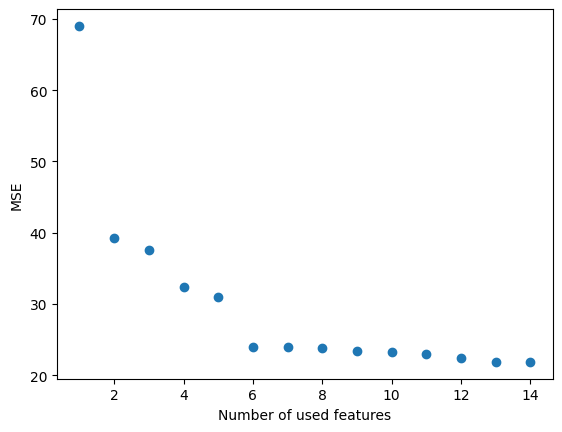

We get a close approximation ( 1.0965915710354222 *OPT) to the optimal MSE with 6 features.


In [28]:
import matplotlib.pyplot as plt

plt.scatter(range(1,n+1),mses)
plt.xlabel('Number of used features')
plt.ylabel('MSE')
plt.show()

print("We get a close approximation (", mses[5]/mses[13], "*OPT) to the optimal MSE with 6 features.")


# Question 4

Perform a cross-validation of the linear regression on the train set with K=5. Print the CV scores for each repeat.

In [29]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(mdl, train_x, train_y, cv=5))

[0.74811568 0.67854664 0.63940723 0.58340984 0.74913715]
